# Generate Canny Edge and compute MSE and SSIM

In [7]:
from skimage.metrics import structural_similarity as ssim 
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import cv2

In [8]:
#Mean Square Error Function
def mse(imageA, imageB):
    err= np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [9]:
#Comparision Plotter
def compare_image(imageA, imageB, title):
    m= mse(imageA, imageB)
    s= ssim(imageA, imageB)
    fig= plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))    
    
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
    plt.savefig(title+'.png')
    plt.show()
    

In [10]:
#Loading the images
original = cv2.imread("cityscape1.png")
canny = cv2.imread("cityscape1_canny.png")
dexined_avg = cv2.imread("cityscape1_dexined_avg.png")
dexined_fused = cv2.imread("cityscape1_dexined_fused.png")

In [11]:
#Converting to grayscale cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
original= cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
canny= cv2.cvtColor(canny, cv2.COLOR_BGR2GRAY)
dexined_avg = cv2.cvtColor(dexined_avg, cv2.COLOR_BGR2GRAY)
dexined_fused= cv2.cvtColor(dexined_fused, cv2.COLOR_BGR2GRAY)

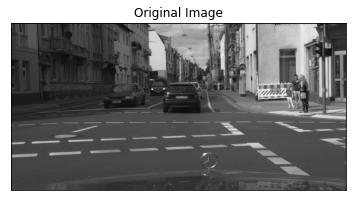

In [12]:
#Plotting and saving Grayscale Image
plt.imshow(original,cmap = 'gray')
plt.imsave('cityscape1_grey.png', original, cmap='gray', format='png')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()

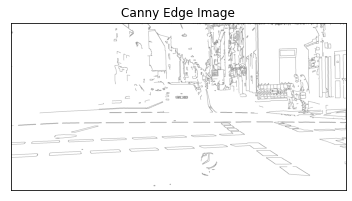

In [13]:
#Finding Edges Using Canny Filter
edges = cv2.Canny(original,100,200)
edges = cv2.bitwise_not(edges)
plt.imshow(edges,cmap = 'gray')
plt.title('Canny Edge Image'), plt.xticks([]), plt.yticks([])
plt.imsave('cityscape1_canny.png', edges, cmap='gray', format='png')
plt.show()

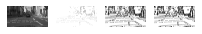

In [14]:
# Initializing figures
fig = plt.figure("Comparing Edge Detectors")
images = ("Original", original), ("Canny Edge", canny), ("DEXINED Average", dexined_avg), ('DEXINED Fused', dexined_fused)
        
# loop over the images
for (i, (name, image)) in enumerate(images):
    # show the image
    ax = fig.add_subplot(1, 7, i + 1)
#     ax.set_title(name)
    plt.imshow(image, cmap = plt.cm.gray)
    
    plt.axis("off")

# show the figure
plt.savefig('combined.png')
plt.show()


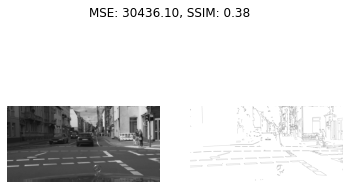

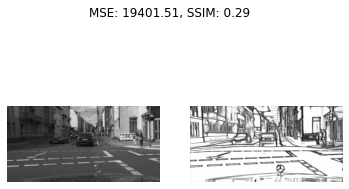

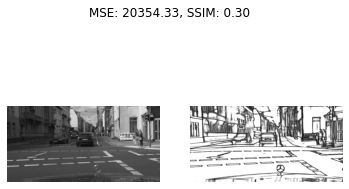

In [15]:
#PLotting Comparisions
compare_image(original, canny, 'canny comparision')
compare_image(original, dexined_avg, 'Dexined average comparision')
compare_image(original, dexined_fused, 'Dexined Fused Comparision')